In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Data Loading 

In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split

# Load the dataset 
data = pd.read_csv('processed_data_Encoding.csv')

# Separate features and target
X = data.drop('y', axis=1) 
y = data['y']

# Split into training and testing datasets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Example: Check the shape of the datasets
print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")


X_train shape: (36168, 37)
X_test shape: (9043, 37)


feature selection

In [3]:
# from sklearn.ensemble import RandomForestClassifier
# import pandas as pd

# # Assuming X and y are your features and target variables
# rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
# rf_model.fit(X, y)

# # Get feature importances and sort them
# feature_importances = pd.Series(rf_model.feature_importances_, index=X.columns)
# sorted_importances = feature_importances.sort_values(ascending=False)

# # Select top 20 features
# top_20_features = sorted_importances.head(20).index
# X_selected = X[top_20_features]


# RF Model

Random Forest - Training Accuracy: 0.9997788099977881
Random Forest - Test Accuracy: 0.8899701426517749
Random Forest - Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.98      0.94      7952
           1       0.63      0.22      0.32      1091

    accuracy                           0.89      9043
   macro avg       0.76      0.60      0.63      9043
weighted avg       0.87      0.89      0.87      9043



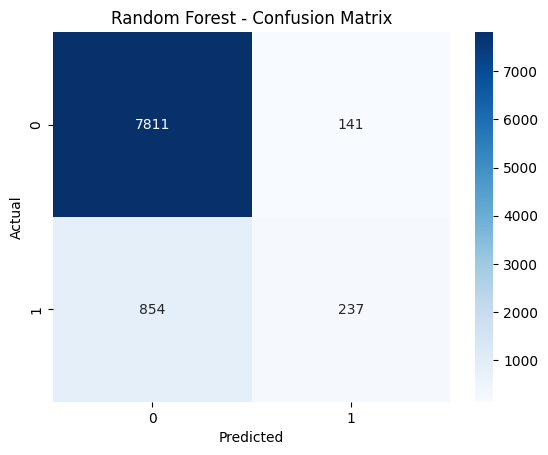

In [4]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Initialize the model
rf_model = RandomForestClassifier(random_state=42)

# rf_model = RandomForestClassifier(
#     n_estimators=200, 
#     max_depth=20, 
#     min_samples_split=10, 
#     min_samples_leaf=4, 
#     class_weight='balanced',
#     random_state=42
# )


# Train the model
rf_model.fit(X_train, y_train)

# Make predictions
rf_y_pred_train = rf_model.predict(X_train)
rf_y_pred_test = rf_model.predict(X_test)

# Evaluate
print("Random Forest - Training Accuracy:", accuracy_score(y_train, rf_y_pred_train))
print("Random Forest - Test Accuracy:", accuracy_score(y_test, rf_y_pred_test))

# Classification Report
print("Random Forest - Classification Report:")
print(classification_report(y_test, rf_y_pred_test))

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, rf_y_pred_test)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title("Random Forest - Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# Tunning 

Fitting 3 folds for each of 162 candidates, totalling 486 fits
Best Parameters: {'class_weight': 'balanced_subsample', 'max_depth': 20, 'min_samples_leaf': 4, 'min_samples_split': 10, 'n_estimators': 200}
Random Forest Post-Tuning - Training Accuracy: 0.9027040477770405
Random Forest Post-Tuning - Test Accuracy: 0.8575693906889307
Random Forest Post-Tuning - Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.90      0.92      7952
           1       0.43      0.52      0.47      1091

    accuracy                           0.86      9043
   macro avg       0.68      0.71      0.69      9043
weighted avg       0.87      0.86      0.86      9043



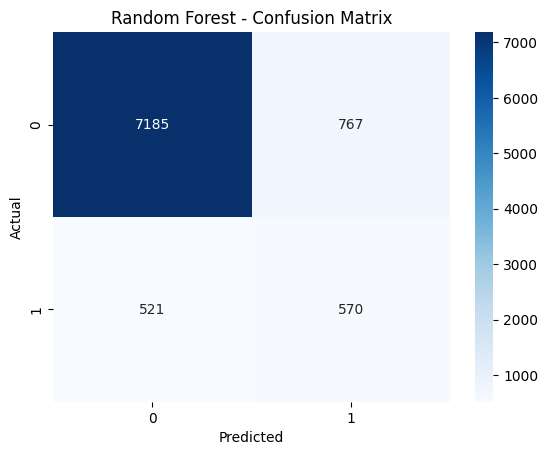

In [5]:
from sklearn.model_selection import GridSearchCV

# Define parameter grid
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'class_weight': ['balanced', 'balanced_subsample']
}

# Initialize Random Forest and GridSearch
rf_model = RandomForestClassifier(random_state=42)
grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=3, scoring='f1', verbose=2, n_jobs=-1)

# Fit GridSearch
grid_search.fit(X_train, y_train)

# Best Parameters
print("Best Parameters:", grid_search.best_params_)

# Use the best model
best_rf_model = grid_search.best_estimator_


# Make predictions
rf_tune_y_pred_train = best_rf_model.predict(X_train)
rf_tune_y_pred_test = best_rf_model.predict(X_test)

# Evaluate
print("Random Forest Post-Tuning - Training Accuracy:", accuracy_score(y_train, rf_tune_y_pred_train))
print("Random Forest Post-Tuning - Test Accuracy:", accuracy_score(y_test, rf_tune_y_pred_test))

# Classification Report
print("Random Forest Post-Tuning - Classification Report:")
print(classification_report(y_test, rf_tune_y_pred_test))

## Confusion Matrix
conf_matrix = confusion_matrix(y_test, rf_tune_y_pred_test)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title("Random Forest - Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


# Save the model

In [6]:
import joblib

# Save the best Random Forest model
joblib.dump(best_rf_model, 'random_forest_model.pkl')
print("Random Forest model saved successfully!")

Random Forest model saved successfully!
